<a href="https://colab.research.google.com/github/jwilson137/deep_learning_image_recognition/blob/main/Deep_Learning_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
import matplotlib.pylab as plt

# Basic Model

In [2]:
model = keras.models.Sequential()
model.add(Dense(3,input_dim=2, activation = 'ReLU'))
model.add(Dense(3,activation = 'ReLU'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Verify Data

In [3]:
cifar10_class_names = {
    0: 'Plane', 
    1: 'Car', 
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog', 
    7: 'Horse', 
    8: 'Boat', 
    9: 'Truck'
}

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


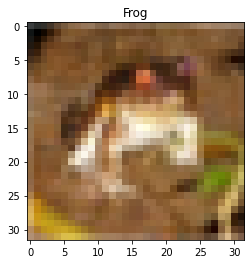

In [5]:
for i in range(1):
  # grab an image from the data set
  sample_image = x_train[i]
  # grab the image's expected class id
  image_class_number = y_train[i][0]
  # look up the class name from the class id
  image_class_name = cifar10_class_names[image_class_number]
  # Draw the image as a plot
  plt.imshow(sample_image)
  # Label the image
  plt.title(image_class_name)
  # Show plot on the screen
  plt.show()

# Cleaning Data 

In [6]:
# Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data set to 0-to-1 range
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train/255
x_test = x_test/255

# Convert class vectors to binary matricies
# Our labels are single values from 0 to 9
# Instead we want one-hot encoding
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

# Create Model

In [7]:
#Create the model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (32,32,3)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #reduce size
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #reduce size
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss='categorical_crossentropy', 
    optimizer ='adam', 
    metrics=['accuracy']
)

#model.summary()

# Train Model

In [8]:
# train the model 
model.fit(
    x_train,
    y_train, 
    batch_size=32, 
    epochs=30, 
    validation_data=(x_test, y_test), 
    shuffle=True
)

Epoch 1/30
1563/1563 [==============================] - 38s 19ms/step - loss: 1.6015 - accuracy: 0.4120 - val_loss: 1.2091 - val_accuracy: 0.5693
Epoch 2/30
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1890 - accuracy: 0.5788 - val_loss: 1.0393 - val_accuracy: 0.6292
Epoch 3/30
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0262 - accuracy: 0.6351 - val_loss: 0.9269 - val_accuracy: 0.6711
Epoch 4/30
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9300 - accuracy: 0.6745 - val_loss: 0.8765 - val_accuracy: 0.7036
Epoch 5/30
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8523 - accuracy: 0.6994 - val_loss: 0.8138 - val_accuracy: 0.7173
Epoch 6/30
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8092 - accuracy: 0.7168 - val_loss: 0.7329 - val_accuracy: 0.7455
Epoch 7/30
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7640 - accuracy: 0.7301 - val_loss: 0.7113 -

# Save NNet

In [11]:
# Save NNet structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save NNet trained weights
model.save_weights("model_weights.h5")

# Load NNet

In [28]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pylab as plt
import numpy as np

In [34]:
class_labels = {
    0: 'Plane', 
    1: 'Car', 
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog', 
    7: 'Horse', 
    8: 'Boat', 
    9: 'Truck'
}

In [22]:
# Load json file that contains model structure
f = Path('model_structure.json')
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [41]:
# Load an image file
img = image.load_img("cat.png", target_size = (32,32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img)/255

# Add a fourth dimension to the image unsqueeze
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

single_result = results[0]
most_likely_class_index = int(np.argmax(single_result))

class_likelihood = single_result[most_likely_class_index]

class_label = class_labels[most_likely_class_index]

mystring = 'This image is a {} - Likelihood: {:2f}'.format(class_label, class_likelihood)
print(mystring)

This image is a Cat - Likelihood: 0.999198
